# Projeto 2 - Classificador Automático de Sentimento

Você foi contratado por uma empresa parar analisar como os clientes estão reagindo a um determinado produto no Twitter. A empresa deseja que você crie um programa que irá analisar as mensagens disponíveis e classificará como "relevante" ou "irrelevante". Com isso ela deseja que mensagens negativas, que denigrem o nome do produto, ou que mereçam destaque, disparem um foco de atenção da área de marketing.<br /><br />
Como aluno de Ciência dos Dados, você lembrou do Teorema de Bayes, mais especificamente do Classificador Naive-Bayes, que é largamente utilizado em filtros anti-spam de e-mails. O classificador permite calcular qual a probabilidade de uma mensagem ser relevante dadas as palavras em seu conteúdo.<br /><br />
Para realizar o MVP (*minimum viable product*) do projeto, você precisa implementar uma versão do classificador que "aprende" o que é relevante com uma base de treinamento e compara a performance dos resultados com uma base de testes.<br /><br />
Após validado, o seu protótipo poderá também capturar e classificar automaticamente as mensagens da plataforma.

## Informações do Projeto

Prazo: 13/Set até às 23:59.<br />
Grupo: 1 ou 2 pessoas.<br /><br />
Entregáveis via GitHub: 
* Arquivo notebook com o código do classificador, seguindo as orientações abaixo.
* Arquivo Excel com as bases de treinamento e teste totalmente classificado.

**NÃO disponibilizar o arquivo com os *access keys/tokens* do Twitter.**


### Check 3: 

Até o dia 06 de Setembro às 23:59, o notebook e o xlsx devem estar no Github com as seguintes evidências: 
    * Conta no twitter criada.
    * Produto escolhido.
    * Arquivo Excel contendo a base de treinamento e teste já classificado.

Sugestão de leitura:<br />
http://docs.tweepy.org/en/v3.5.0/index.html<br />
https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/

___

## Preparando o ambiente

Instalando a biblioteca *tweepy* para realizar a conexão com o Twitter:

In [18]:
%%capture

#Instalando o tweepy
!pip install tweepy

Importando as Bibliotecas que serão utilizadas. Esteja livre para adicionar outras.

In [19]:
%matplotlib inline
import tweepy
import math
import os.path
import pandas as pd
import json
from random import shuffle

___
## Autenticando no  Twitter

Para realizar a captura dos dados é necessário ter uma conta cadastrada no twitter:

* Conta: ***[@LuccaDelchiaro]***


1. Caso ainda não tenha uma: https://twitter.com/signup
1. Depois é necessário registrar um app para usar a biblioteca: https://apps.twitter.com/
1. Dentro do registro do App, na aba Keys and Access Tokens, anotar os seguintes campos:
    1. Consumer Key (API Key)
    1. Consumer Secret (API Secret)
1. Mais abaixo, gere um Token e anote também:
    1. Access Token
    1. Access Token Secret
    
1. Preencha os valores no arquivo "auth.pass"

**ATENÇÃO**: Nunca divulgue os dados desse arquivo online (GitHub, etc). Ele contém as chaves necessárias para realizar as operações no twitter de forma automática e portanto é equivalente a ser "hackeado". De posse desses dados, pessoas mal intencionadas podem fazer todas as operações manuais (tweetar, seguir, bloquear/desbloquear, listar os seguidores, etc). Para efeito do projeto, esse arquivo não precisa ser entregue!!!

In [20]:
#Dados de autenticação do twitter:

#Coloque aqui o identificador da conta no twitter: @fulano

#leitura do arquivo no formato JSON
with open('auth.pass') as fp:    
    data = json.load(fp)

#Configurando a biblioteca. Não modificar
auth = tweepy.OAuthHandler(data['consumer_key'], data['consumer_secret'])
auth.set_access_token(data['access_token'], data['access_token_secret'])

FileNotFoundError: [Errno 2] No such file or directory: 'auth.pass'

___
## Coletando Dados

Agora vamos coletar os dados. Tenha em mente que dependendo do produto escolhido, não haverá uma quantidade significativa de mensagens, ou ainda poder haver muitos retweets.<br /><br /> 
Configurando:

In [21]:
#Produto escolhido:
produto = 'Rick_and_Morty'

#Quantidade mínima de mensagens capturadas:
n = 500
#Quantidade mínima de mensagens para a base de treinamento:
t = 300

#Filtro de língua, escolha uma na tabela ISO 639-1.
lang = 'pt'

Capturando os dados do twitter:

In [22]:
#Cria um objeto para a captura
api = tweepy.API(auth)

#Inicia a captura, para mais detalhes: ver a documentação do tweepy
i = 1
msgs = []
for msg in tweepy.Cursor(api.search, q=produto, lang=lang).items():    
    msgs.append(msg.text.lower())
    i += 1
    if i > n:
        break

#Embaralhando as mensagens para reduzir um possível viés
shuffle(msgs)

NameError: name 'auth' is not defined

Salvando os dados em uma planilha Excel:

In [23]:
#Verifica se o arquivo não existe para não substituir um conjunto pronto
if not os.path.isfile('./{0}.xlsx'.format(produto)):
    
    #Abre o arquivo para escrita
    writer = pd.ExcelWriter('{0}.xlsx'.format(produto))

    #divide o conjunto de mensagens em duas planilhas
    dft = pd.DataFrame({'Treinamento' : pd.Series(msgs[:t])})
    dft.to_excel(excel_writer = writer, sheet_name = 'Treinamento', index = False)

    dfc = pd.DataFrame({'Teste' : pd.Series(msgs[t:])})
    dfc.to_excel(excel_writer = writer, sheet_name = 'Teste', index = False)

    #fecha o arquivo
    writer.save()

___
## Classificando as Mensagens

Agora você deve abrir o arquivo Excel com as mensagens capturadas e classificar na Coluna B se a mensagem é relevante ou não.<br /> 
Não se esqueça de colocar um nome para a coluna na célula **B1**.<br /><br />
Fazer o mesmo na planilha de Controle.

___
## Montando o Classificador Naive-Bayes

Com a base de treinamento montada, comece a desenvolver o classificador. Escreva o seu código abaixo:

Opcionalmente: 
* Limpar as mensagens removendo os caracteres: enter, :, ", ', (, ), etc. Não remover emojis.<br />
* Corrigir separação de espaços entre palavras e/ou emojis.
* Propor outras limpezas/transformações que não afetem a qualidade da informação.



In [24]:
#Importa excel e divide em dados relevantes e irrelevantes
data=pd.read_excel('Rick_and_Morty.xlsx')
data=data.iloc[:,[0,14]]
#filtra pontuação e palavras com pouca informação
data['Treinamento']=data['Treinamento'].str.replace(':','')
data['Treinamento']=data['Treinamento'].str.replace(',','')
data['Treinamento']=data['Treinamento'].str.replace("'",'')
data['Treinamento']=data['Treinamento'].str.replace('-','')
data['Treinamento']=data['Treinamento'].str.replace('"','')
data['Treinamento']=data['Treinamento'].str.replace(')','')
data['Treinamento']=data['Treinamento'].str.replace('(','')
data['Treinamento']=data['Treinamento'].str.replace(' é ',' ')
data['Treinamento']=data['Treinamento'].str.replace(' a ',' ')
data['Treinamento']=data['Treinamento'].str.replace(' o ',' ')
data['Treinamento']=data['Treinamento'].str.replace(' e ',' ')
data['Treinamento']=data['Treinamento'].str.replace(' os ',' ')
data['Treinamento']=data['Treinamento'].str.replace(' as ',' ')
data['Treinamento']=data['Treinamento'].str.replace(' ou ',' ')
data['Treinamento']=data['Treinamento'].str.replace(' que ',' ')
data['Treinamento']=data['Treinamento'].str.replace(' nas ',' ')
data['Treinamento']=data['Treinamento'].str.replace(' na ',' ')
data['Treinamento']=data['Treinamento'].str.replace(' no ',' ')
data['Treinamento']=data['Treinamento'].str.replace(' nos ',' ')
data['Treinamento']=data['Treinamento'].str.replace(' de ',' ')
data['Treinamento']=data['Treinamento'].str.replace(' dos ',' ')
data['Treinamento']=data['Treinamento'].str.replace(' das ',' ')
data['Treinamento']=data['Treinamento'].str.replace(' da ',' ')
data['Treinamento']=data['Treinamento'].str.replace(' do ',' ')
data['Treinamento']=data['Treinamento'].str.replace('1','')
data['Treinamento']=data['Treinamento'].str.replace('2','')
data['Treinamento']=data['Treinamento'].str.replace('3','')
data['Treinamento']=data['Treinamento'].str.replace('4','')
data['Treinamento']=data['Treinamento'].str.replace('5','')
data['Treinamento']=data['Treinamento'].str.replace('6','')
data['Treinamento']=data['Treinamento'].str.replace('7','')
data['Treinamento']=data['Treinamento'].str.replace('8','')
data['Treinamento']=data['Treinamento'].str.replace('9','')
data['Treinamento']=data['Treinamento'].str.replace('0','')
data['Treinamento']=data['Treinamento'].str.replace('?','')
data['Treinamento']=data['Treinamento'].str.replace('!','')
data['Treinamento']=data['Treinamento'].str.replace('|','')
data['Treinamento']=data['Treinamento'].str.replace('/',' ')
data['Treinamento']=data['Treinamento'].str.replace('.',' ')
data['Treinamento']=data['Treinamento'].str.replace('  ',' ')

#separa em relevante  e irrelevante
rdata=data[(data.B1=="Relevante")].copy()
idata=data[(data.B1=="Irrelevante")].copy()

In [25]:
#Calcula p(A), fazendo o número de tweets que pertencem à categoria dividido pelo
#total de tweets no training set
ntr=rdata.shape[0]
nti=idata.shape[0]
pA=ntr/300
pnotA=nti/300

In [26]:
#Passa as palavras para listas
rdata['Treinamento']=rdata['Treinamento'].str.split(pat=None,n=-1,expand=False)
idata['Treinamento']=idata['Treinamento'].str.split(pat=None,n=-1,expand=False)
rdata=rdata['Treinamento'].sum(axis=None, skipna=None, level=None, numeric_only=None)
idata=idata['Treinamento'].sum(axis=None, skipna=None, level=None, numeric_only=None)

In [27]:
#Armazena o número de palavras relevantes e irrelevantes
nr=len(rdata)
ni=len(idata)

In [28]:
#Contando quantas vezes cada palavra aparece em cada lista e armazena os valores em um dicionário
rdic={}
c=0
while c<len(rdata):
    if rdata[c] in rdic:
        rdic[rdata[c]]=rdic[rdata[c]]+1
    else:
        rdic[rdata[c]]=1
    c=c+1
idic={}
c=0
while c<len(idata):
    if idata[c] in idic:
        idic[idata[c]]=idic[idata[c]]+1
    else:
        idic[idata[c]]=1
    c=c+1

In [29]:
#Contando o número de possíveis palavras
npr=len(rdic.keys())
npi=len(idic.keys())
npp=npr+npi

In [30]:
#calculamos a probabilidade de de cada palavra dado que ela pertence a seu conjunto (P(B|A))
for key in rdic:
    rdic[key]=(rdic[key]+1)/(nr+npp)
for key in idic:
    idic[key]=(idic[key]+1)/(ni+npp)

In [31]:
#Definindo a função que classifica uma dada frase
def classifica(frase):
    palavras=frase.split(" ")
    c=0
    pr=1
    pi=1
    while c<len(palavras):
        if palavras[c] in rdic:
            pr=pr*rdic[palavras[c]]
        else:
            pr=pr*(1/npp)
        c=c+1
    #Multiplica resultado (P(B|A)) por P(A)
    pr=pr*pA
    c=0
    while c<len(palavras):
        if palavras[c] in idic:
            pi=pi*idic[palavras[c]]
        else:
            pi=pi*(1/npp)
        c=c+1
    pi=pi*pnotA
    if pr>pi:
        return ["Relevante",pr,pi]
    else:
        return ["Irrelevante",pr,pi]

___
## Verificando a performance

Agora você deve testar o seu Classificador com a base de Testes.<br /><br /> 

Você deve extrair as seguintes medidas:
* Porcentagem de positivos falsos (marcados como relevante mas não são relevantes)
* Porcentagem de positivos verdadeiros (marcado como relevante e são relevantes)
* Porcentagem de negativos verdadeiros (marcado como não relevante e não são relevantes)
* Porcentagem de negativos falsos (marcado como não relevante e são relevantes)

Opcionalmente:
* Criar categorias intermediárias de relevância baseado na diferença de probabilidades. Exemplo: muito relevante, relevante, neutro, irrelevante e muito irrelevante.

In [32]:
#Importa excel de teste e monta um dataframe comparando a classificação humana
#com a do Naive-bayes
tdata=pd.read_excel("Rick_and_Morty.xlsx", sheetname = "Teste")
tdata=tdata.iloc[:,[0,14]]
tweets=tdata['Teste'].values.tolist()
valores=tdata['Relevancia'].values.tolist()
c=0
naive=[]
pr=[]
pi=[]
while c<200:
    v=classifica(tweets[c])
    naive.append(v[0])
    pr.append(v[1])
    pi.append(v[2])
    c=c+1
c=0
resultado=[]
while c<200:
    if valores[c]==naive[c] and valores[c]=="Relevante":
        resultado.append("Positivo Verdadeiro")
    elif valores[c]!=naive[c] and valores[c]=="Relevante":
        resultado.append("Negativo Falso")
    elif valores[c]==naive[c] and valores[c]=="Irrelevante":
        resultado.append("Negativo Verdadeiro")
    elif valores[c]!=naive[c] and valores[c]=="Irrelevante":
        resultado.append("Positivo Falso")
    c=c+1
        
resposta = pd.DataFrame({'Tweet':tweets,'Humana':valores,'Naive':naive,'Resultado':resultado})

In [33]:
#Para criar classificações intermediárias, dividimos Pr por Pi, assim podemos comparar a magnitude 
c=0
razao=[]
while c<200:
    razao.append(pr[c]/pi[c])
    c=c+1

In [34]:
#Classificamos a relevância dependendo da magnitude da razão
c=0
inter=[]
while c<200:
    if 0.5<razao[c] and razao[c]<5:
        inter.append("Neutro")
    elif 10**-5<razao[c] and razao[c]<0.5:
        inter.append("Irrelevante")
    elif 5<razao[c] and razao[c]<10**5:
        inter.append("Relevante")
    elif razao[c]<=10**-5:
        inter.append("Muito Irrelevante")
    elif 10**5<razao[c]:
        inter.append("Muito Relevante")
    c=c+1
probabilidades = pd.DataFrame({'Pr':pr,'Pi':pi,'Pr/Pi':razao,'Classificacao':inter})

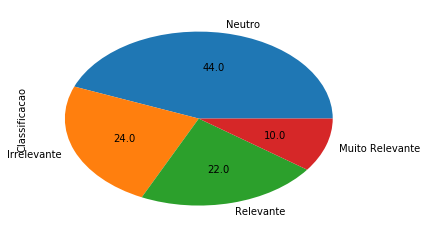

In [35]:
#Plotamos um gráfico de setores com as porcentagens de cada possível classificação
seg1=probabilidades.Classificacao.value_counts(True)*100
seg1.plot(kind='pie',autopct="%0.1f",legend=False)

In [36]:
#Criando uma cross table que compara a classificação humana com a do Naive
ct=pd.crosstab(resposta.Humana, resposta.Naive)
ct

Naive,Irrelevante,Relevante
Humana,,
Irrelevante,50,44
Relevante,27,79


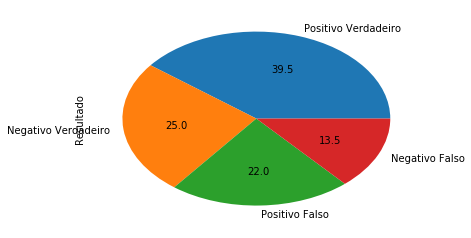

In [37]:
#Plota as porcentagens em gráfico de setor
seg2=resposta.Resultado.value_counts(True)*100
seg2.plot(kind='pie',autopct="%0.1f",legend=False)

___
## Concluindo

Escreva aqui a sua conclusão.<br /> 
Faça um comparativo qualitativo sobre as medidas obtidas.<br />
Explique como são tratadas as mensagens com dupla negação e sarcasmo.<br />
Proponha um plano de expansão. Por que eles devem continuar financiando o seu projeto?<br />

Opcionalmente: 
* Discorrer por que não posso alimentar minha base de Treinamento automaticamente usando o próprio classificador, aplicado a novos tweets.
* Propor diferentes cenários de uso para o classificador Naive-Bayes. Cenários sem intersecção com este projeto.
* Sugerir e explicar melhorias reais no classificador com indicações concretas de como implementar (não é preciso codificar, mas indicar como fazer e material de pesquisa sobre o assunto).


Em conclusão, os resultados obtidos foram positivos, mas limitados, com o classificador obtendo sucesso em 64,5% dos casos. O Naive-Bayes demosntrou uma leve tendência a considerar  as mensagens relevantes, o que gerou uma maior ocorrência de positivos. Isso possivelmente ocorreu devido ao número superior de mensagens relevantes em relação às irrelevantes no database de teste.

Apesar de não terem sido encontradas muitas mensagens com sarcasmo ou dupla negação neste database, podemos usar nosso conhecimento sobre o Naive-Bayes para concluír o que ocorreria caso o software fosse exposto a elas. O Naive-Bayes é um algorítmo simples, que trabalha analizando a frequência com que palavras aparecem e tratando as palavras de uma frase com independentes. Isso faz com que ele seja incapaz de notar sutilezas que denunciam sarcasmo. Como ele considera cada palavra da frase com independente, ele também seria incapaz de compreender o significado de uma dupla negação. Por esses motivos, o Naive-Bayes provavelmente classificaria esse tipo de tweets como irrelevantes.

Alimentar a base de treinamento com os tweets classificados pelo próprio classificador não seria útil. Como ele só colocaria na base de frases relevantes as frases que ele já teria considerado como relevantes, esse processo não traria nenhuma informação nova para o classificador e provavelmente só aprofundaria as tendências que o classificador já tinha (tanto as tendências positivas quanto as negativas)

O princípio fundamental do classificador Naive-Bayes é o teorema de Bayes, que nos fornece a probabilidade P(A|B) quando temos, entre outros valores, a probabilidade P(B|A). Assim, esse classificador poderá ser usado em casos em que precisamos encontrar P(A|B) e temos P(B|A). Um possível exemplo seria utilizá-lo para calcular a probabilidade de certo clima dado um banco de dados com várias medidas e o clima daquele dia. Assim, para calcular a probabilidade de chuver em um dia, dado a temperatura, umidade e outras medidas, o classificador olharia um banco de dados com dias em que choveu e as medidas dos dias respectivos. Assim como fizemos para analizar frases, consideraríamos que cada medida é independente da outra, multiplicando suas probabilidades para obter a probabilidade de que todas elas tenham ocorrido no dia.

Enquanto analizávamos os tweets encontramos diversas mensagens que seriam úteis para o marketing do produto escolhido, incluíndo opiniões sobre ele, críticas, elogios e reclamações. Essas informações poderiam ser utilizadas para melhorar a performance do produto. Apesar disso, o processo manual é muito lento e custoso. Faz sentido econômico investir em um software que automatiza esse processo e permanece funcionando sem grande manutenção. Existem diversas formas de aperfeiçoar o software, como melhorar o processo de filtração, aumentar o database de treinamento e definir regras mais rigorosas para quais mensagens são relevantes. Com essas melhorias, a taxa de acerto do software melhoraria muito, economizando muito dinheiro para a empresa.

Para aperfeiçoar a performance do classificador ainda mais, poderíamos estudar mais palavras que carregam pouco informação e removê-las do conjunto de treinamento, como já fizemos com algumas palavras em nosso projeto. Além disso também poderíamos agrupar variações da mesma palavra, considerando todas elas como a mesma palavra. Por exemplo, o plural e singular de uma palavra dificilmente carregariam informação muito diferente um do outro, assim, contando ambas ocorrências como a mesma, melhoraríamos a performance. Analizando os tweets encontrados, foi possível perceber uma alta ocorrência de erros de ortografia. Palavras com erros atrapalham o software, pois normalmente são ocorrências únicas que não trazem informação nova. Poderíamos filtrá-las, codificando algumas regras gramaticais em nosso software para limpar o conjunto de testes de erros desse tipo. Por exemplo, sabemos que algumas letras não aparecem duas vezes seguidas em nenhuma palavra da língua portuguesa (como 'l', 'v', 'z', etc.). Poderíamos criar um código que remove palavras em que isso aconteça. Essas técnicas para aperfeiçoar o classificador foram encontradas nos seguintes endereços:
https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/
https://www.vooo.pro/insights/6-passos-faceis-para-aprender-o-algoritmo-naive-bayes-com-o-codigo-em-python/